In [1]:
import sys
sys.path.append("../../")

## 数据

In [8]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from pylib.utils.functions_for_classification import imbalanced_2d_2cls, plot_scatter
import matplotlib.pyplot as plt
import numpy as np

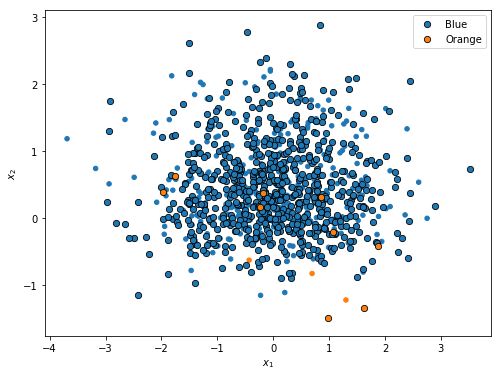

In [9]:
X_train, X_test, y_train, y_test = imbalanced_2d_2cls(sample_size=1000, 
                                                      pos_ratio=0.01)
X = np.r_[X_train, X_test]
y = np.r_[y_train, y_test]
plt.figure(figsize=(8, 6))
plot_scatter(X_train, y_train, X_test, y_test)
plt.show()

In [10]:
print("数据集：class0 = {}, class1 = {}".format(len(X[y == 0]),
                                            len(X[y == 1])))
print("训练集：class0 = {}, class1 = {}".format(len(X_train[y_train == 0]),
                                            len(X_train[y_train == 1])))
print("测试集：class0 = {}, class1 = {}".format(len(X_test[y_test == 0]), 
                                            len(X_test[y_test == 1])))

数据集：class0 = 987, class1 = 13
训练集：class0 = 691, class1 = 9
测试集：class0 = 296, class1 = 4


## 模型

In [11]:
from sklearn.svm import SVC

model = SVC(kernel='rbf', class_weight="balanced", 
            probability=True, random_state=42)
model.fit(X_train, y_train)

SVC(class_weight='balanced', probability=True, random_state=42)

In [12]:
model.score(X_test, y_test)

0.9866666666666667

In [13]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

### 混淆矩阵

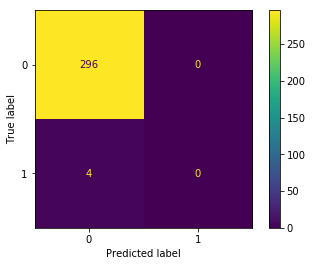

In [14]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

plot_confusion_matrix(model, X_test, y_test)
plt.show()

### 精准率和召回率

In [15]:
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred)
precision

E:\a-soft\Anaconda3\envs\mlproduct\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

In [16]:
from sklearn.metrics import recall_score

recall = recall_score(y_test, y_pred)
recall

0.0

In [17]:
from sklearn.metrics import fbeta_score

f_2 = fbeta_score(y_test, y_pred, beta=2)
f_2

0.0

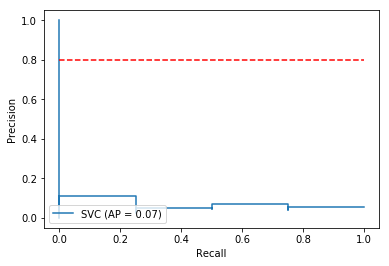

In [18]:
from sklearn.metrics import plot_precision_recall_curve

plot_precision_recall_curve(model, X_test, y_test)
plt.plot([0., 1.], [0.8, 0.8], "r--")
plt.show()

In [19]:
from sklearn.metrics import precision_recall_curve, auc

precision, recall, _ = precision_recall_curve(y_test, y_proba[:, 1])
pr_auc = auc(recall, precision)
pr_auc

0.05007497668078267

### ROC 曲线

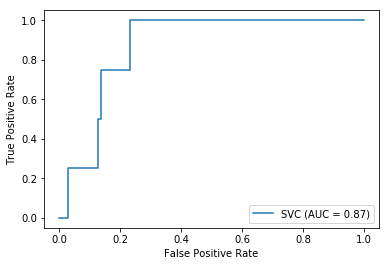

In [20]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(model, X_test, y_test)
plt.show()

In [21]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, y_proba[:, 1])
roc_auc

0.8690878378378378